# Boston Marathon Challenge
> Looking at 2014 Boston Marathon data and experimenting with clustering methods

**Note**: While I had originally wanted to look at 2013 data, before realizing that 2013 was the year of the Boston Marathon bombing. As a result, there were no wave 4 finishers recorded in the data and I decided that it was too skewed to continue. 

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("results.csv", error_bad_lines=False)

In [3]:
data.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [4]:
data.describe()

,division,age,official,genderdiv,overall,pace
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000
mean,1932.563032,42.407079,242.997314,8051.044741,15939.587825,9.275658
std,1715.228694,11.316496,52.300431,4754.005626,9232.978224,1.992486
min,1.000000,18.000000,80.600000,1.000000,1.000000,3.080000
25%,610.000000,33.000000,205.527500,3972.000000,7943.750000,7.850000
50%,1425.000000,42.000000,232.370000,7970.000000,15939.500000,8.870000
75%,2611.000000,50.000000,273.235000,11968.000000,23935.250000,10.430000
max,6979.000000,81.000000,538.880000,17575.000000,31931.000000,20.570000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


In [5]:
data.isnull().sum()

10k              0
name             0
division         0
25k              0
gender           0
age              0
official         0
bib              0
genderdiv        0
ctz          30740
35k              0
overall          0
pace             0
state         2576
30k              0
5k               0
half             0
20k              0
country          0
city             1
40k              0
dtype: int64

In [6]:
data.shape

(31984, 21)

In [7]:
null_state = data.query("state.isnull()")

In [8]:
null_state['country'].value_counts()

GBR    346
ITA    212
MEX    205
GER    182
JPN    175
AUS    124
IRL    119
FRA    115
ESP     89
BRA     87
SWE     66
SUI     62
KOR     60
NED     54
HKG     53
DEN     50
CHN     42
COL     40
CHI     29
FIN     28
ISL     28
BEL     27
SIN     23
AUT     22
NOR     21
VEN     19
RSA     19
RUS     18
TPE     18
BER     18
      ... 
SVK      4
PHI      4
TUR      4
LUX      4
HUN      3
PAN      3
DOM      3
UKR      3
ECU      3
ROU      2
ESA      2
EGY      2
QAT      2
THA      2
BAH      2
TAN      1
VGB      1
EST      1
ZIM      1
CRO      1
LIE      1
BAR      1
TRI      1
URU      1
CAY      1
INA      1
BOL      1
BRN      1
MAR      1
BLR      1
Name: country, Length: 76, dtype: int64

Entries with missing state are out of country, so we change the value to reflect that with OTH.

In [9]:
data['state'] = data.state.replace(np.nan, 'OTH', regex=True)

In [10]:
data['state'].isnull().value_counts()

False    31984
Name: state, dtype: int64

In [12]:
data.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,OTH,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,OTH,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,OTH,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,OTH,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,OTH,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [13]:
data = data.drop(['name','ctz'],axis=1)

In [14]:
data.head()

,10k,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,8,47.67,M,47,85.25,W1,8,71.40,8,3.27,OTH,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,1,82.43,F,33,138.95,F1,1,116.37,21,5.30,OTH,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,1,45.80,M,41,80.60,W2,1,67.42,1,3.08,OTH,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,3,82.43,F,24,140.58,F2,3,116.37,27,5.37,OTH,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,2,46.37,M,40,81.23,W3,2,67.83,2,3.10,OTH,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [15]:
data.query('city.isnull()')

,10k,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
14553,50.03,243,127.08,F,54,226.27,16645,4730,184.87,14260,8.63,OTH,155.30,25.22,106.45,100.78,BRA,NaN,213.47


In [16]:
data.query("country == 'BRA'")

,10k,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
52,35.22,16,88.65,F,32,151.30,F24,16,125.43,111,5.78,OTH,106.88,17.50,74.73,70.82,BRA,Sao Paulo,143.40
361,35.77,27,89.75,M,41,159.25,356,282,127.23,309,6.08,OTH,108.25,18.40,75.65,71.78,BRA,Sao Paulo,148.53
561,45.88,1580,117.42,M,42,220.33,586,8781,174.93,12518,8.42,OTH,143.53,23.00,98.30,93.17,BRA,Sao Paulo,207.58
746,39.42,2040,102.98,M,44,260.43,791,12848,155.93,21934,9.93,OTH,127.28,19.45,85.02,80.47,BRA,Sao Paulo,184.65
1620,40.58,968,101.05,M,35,173.62,1832,1243,142.28,1314,6.63,OTH,121.58,20.28,85.28,80.83,BRA,Florianopolis,163.47
1776,40.17,729,101.25,M,44,190.82,2016,3923,150.92,4301,7.28,OTH,124.22,20.05,84.77,80.30,BRA,Sao Paulo,178.60
1991,40.45,14,101.05,M,55,177.20,2265,1710,142.83,1809,6.77,OTH,121.80,20.38,85.38,80.93,BRA,Jundiai S.p.,165.35
2188,39.63,329,100.73,M,43,179.52,2490,2143,145.32,2268,6.85,OTH,122.45,19.98,84.57,80.15,BRA,Sao Paulo,168.77
2335,40.42,160,101.07,M,41,173.75,2658,1258,143.42,1330,6.63,OTH,121.87,20.33,85.13,80.72,BRA,Sao Paulo,164.38
2449,40.77,930,102.62,M,36,173.18,2793,1187,144.67,1253,6.62,OTH,123.43,20.52,86.02,81.55,BRA,Sao Paulo,164.48


In [17]:
# There are enough participants in Brazil that we'll drop the one entrant that didn't supply their city

data = data.dropna(axis=0, how='any')

In [18]:
data.isnull().sum()

10k          0
division     0
25k          0
gender       0
age          0
official     0
bib          0
genderdiv    0
35k          0
overall      0
pace         0
state        0
30k          0
5k           0
half         0
20k          0
country      0
city         0
40k          0
dtype: int64

In [19]:
# Convert checkpoints to numeric types
data = data.replace(to_replace='-', value='')

distances = ['10k', '25k', '35k', '30k', '5k', 'half', '20k', '40k' ]
for distance in distances:
    data[distance] = pd.to_numeric(data[distance])

In [23]:
data = data.dropna()

In [24]:
data.dtypes

10k          float64
division       int64
25k          float64
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
35k          float64
overall        int64
pace         float64
state         object
30k          float64
5k           float64
half         float64
20k          float64
country       object
city          object
40k          float64
dtype: object

In [25]:
data['gender'] = data['gender'].apply(lambda x: 1 if x=='M' else 0)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
data.head()

,10k,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,8,47.67,1,47,85.25,W1,8,71.40,8,3.27,OTH,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,1,82.43,0,33,138.95,F1,1,116.37,21,5.30,OTH,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,1,45.80,1,41,80.60,W2,1,67.42,1,3.08,OTH,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,3,82.43,0,24,140.58,F2,3,116.37,27,5.37,OTH,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,2,46.37,1,40,81.23,W3,2,67.83,2,3.10,OTH,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


Text(0.5, 1.0, 'Participants by Gender (1=Male)')

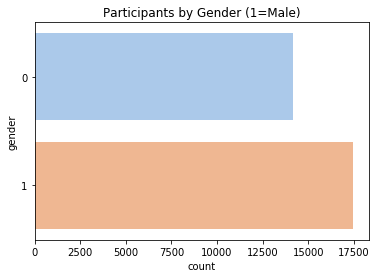

In [27]:
sns.countplot(y=data['gender'], palette='pastel').set_title('Participants by Gender (1=Male)')

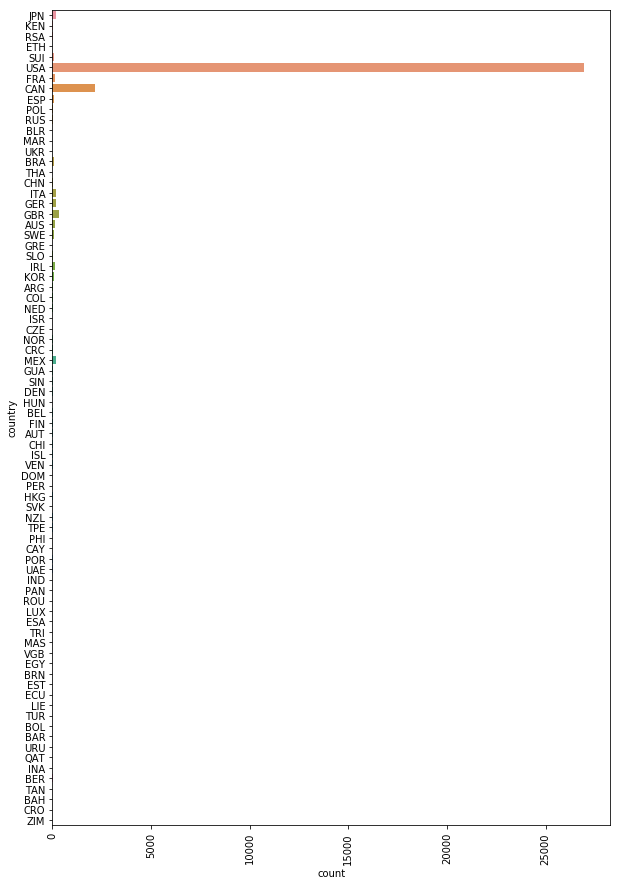

In [28]:
plt.figure(figsize=(10,15))
sns.countplot(y=data['country'])
plt.xticks(rotation=90)
plt.show()

In [29]:
# USA is a huge outlier so we'll drop it and look at the remaining countries 

data_foreign = data[data.country != 'USA']
data_foreign = data_foreign[data_foreign.country != 'CAN']

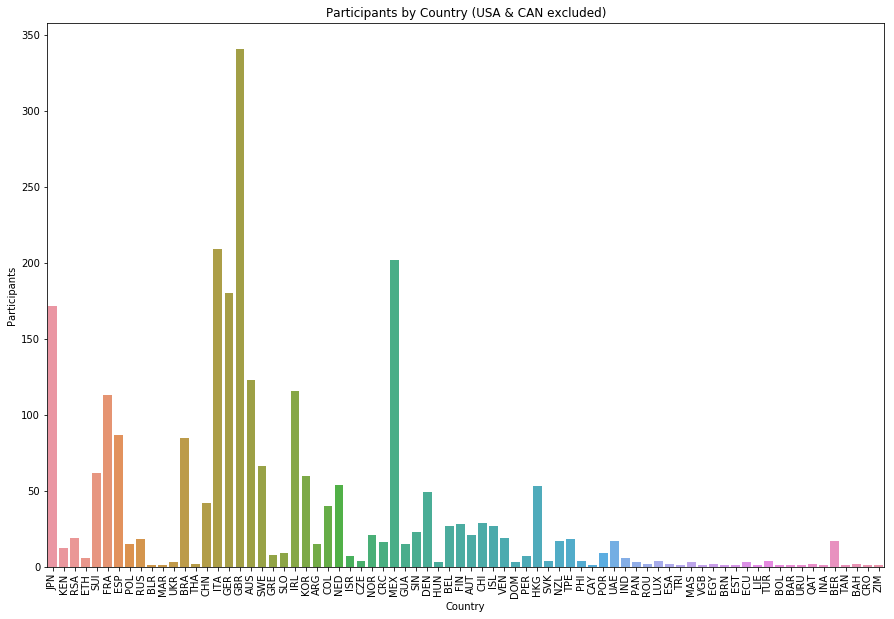

In [30]:
plt.figure(figsize=(15,10))
sns.countplot(data_foreign['country']).set_title('Participants by Country (USA & CAN excluded)')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Participants')
plt.show()

After the USA and Canada, major countries are Great Britain, Germany, Australia, Mexico, Japan, Italy, Ireland, France, and Brazil

Next we'll great bins based on age and registration placement: the race is split into age groups of 5 years, except for the 18-34 crowd. Additionally, the bib number on a participant indicates at what time they started the race, so I'll create those too.

In [31]:
age_bins= [18,35,40,45,50,55,60,65,70,75,80,(data['age'].max()+1)]

age_labels = ['18-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']
data['age_groups'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [32]:
data.head(2)

,10k,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k,age_groups
0,17.37,8,47.67,1,47,85.25,W1,8,71.40,8,3.27,OTH,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43,45-49
1,32.58,1,82.43,0,33,138.95,F1,1,116.37,21,5.30,OTH,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10,18-34


<Figure size 1008x72 with 0 Axes>

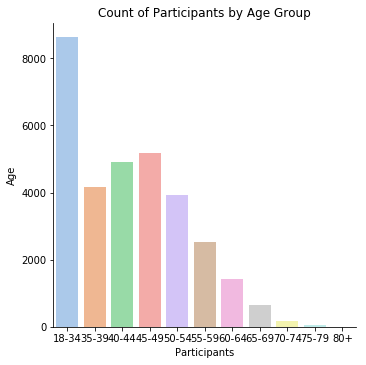

In [33]:
# Plot the figure
plt.figure(figsize=(14,1))
sns.catplot(x="age_groups", 
            kind="count", 
            palette="pastel", 
            data=data)
plt.title('Count of Participants by Age Group')
plt.xlabel('Participants')
plt.ylabel('Age')
plt.show()

In [34]:
# To deal with women and wheelchair racers, who bibs include letters (F for women, W for wheelchair users)
# I decided to label women's bibs with 1. and wheelchair racers with a large number so they wouldn't get mixed
# in with elite users

data['bib'] = data['bib'].str.replace('W','5000')
data['bib'] = data['bib'].str.replace('F','1.')

#convert column to numeric type
data['bib'] = pd.to_numeric(data['bib'])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

In [35]:
data.head(10)

,10k,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k,age_groups
0,17.37,8,47.67,1,47,85.25,50001.0,8,71.40,8,3.27,OTH,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43,45-49
1,32.58,1,82.43,0,33,138.95,1.1,1,116.37,21,5.30,OTH,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10,18-34
2,16.62,1,45.80,1,41,80.60,50002.0,1,67.42,1,3.08,OTH,56.45,7.75,38.03,36.10,RSA,Paarl,76.10,40-44
3,32.57,3,82.43,0,24,140.58,1.2,3,116.37,27,5.37,OTH,99.33,16.20,69.47,65.83,ETH,Shoa,132.95,18-34
4,17.12,2,46.37,1,40,81.23,50003.0,2,67.83,2,3.10,OTH,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72,40-44
5,32.58,4,82.45,0,29,140.68,1.3,4,116.37,28,5.37,OTH,99.33,16.22,69.47,65.83,KEN,Nandi,132.95,18-34
6,17.65,4,47.67,1,28,84.65,50004.0,4,70.23,4,3.23,OTH,58.60,8.38,39.72,37.65,SUI,Neuenkirch,79.83,18-34
7,30.48,5,76.95,1,29,129.83,5.0,5,107.47,5,4.97,OTH,92.52,15.17,64.85,61.62,ETH,Addis Ababa,122.80,18-34
8,17.12,3,46.37,1,43,81.23,50006.0,3,67.83,3,3.10,OTH,57.03,8.00,38.60,36.60,JPN,Isahaya,76.70,40-44
9,30.48,20,77.68,1,31,137.83,6.0,20,112.27,20,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83,18-34


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


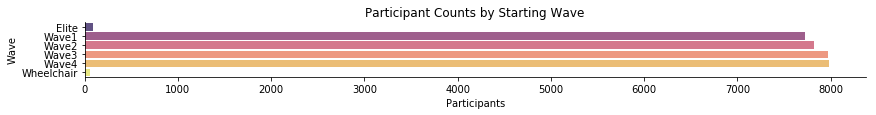

In [36]:
# bib numbers for each wave
wave_bins= [0,101,9000,18000,27000,50000,(data['bib'].max()+1)]

# Create a column for waves
wave_labels = ['Elite', 'Wave1', 'Wave2', 'Wave3', 'Wave4', 'Wheelchair']

# Create a wave column
data['wave'] = pd.cut(data['bib'], bins=wave_bins, labels=wave_labels, right=False)

# wave colors
colors = ["#5E4A8C", "#A95491", "#E46884", "#FF8E6F", "#FFC161", "#F9F871"]

# Plot the figure
plt.figure(figsize=(14,1))
sns.countplot(y=data['wave'], palette=colors)
sns.despine()
plt.title('Participant Counts by Starting Wave')
plt.xlabel('Participants')
plt.ylabel('Wave')
plt.show()

In [37]:
checkpoints = pd.melt(data,
                        value_vars=['5k', '10k', '20k', 'half', '25k', '30k', '35k', '40k', 'official'],
                        var_name='checkpoints',
                        value_name='time',
                        id_vars=['gender'])

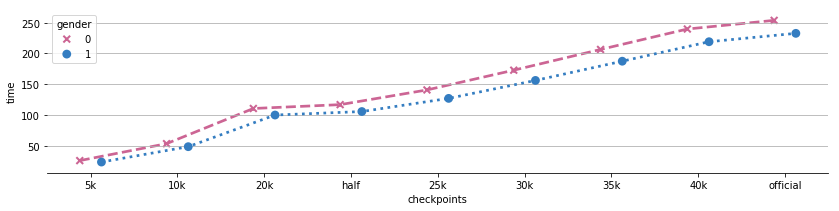

In [38]:
gendered = ['#CC6594','#347DC1']

plt.figure(figsize=(14,3))
ax = sns.pointplot(data=checkpoints,
                  x='checkpoints',
                  y='time',
                  hue='gender',
                  markers=['x','o'],
                  linestyles=['--', ':'],
                  palette=gendered,
                  ci=95,
                  orient="v",
                  dodge=0.25)
ax.grid(axis='y')
sns.despine(left=True)

In [39]:
f_avg = round(data[data['gender'] == 0]['official'].mean(),2)
m_avg = round(data[data['gender'] == 1]['official'].mean(),2)

f_avg_hr = round(f_avg / 60,2)
m_avg_hr = round(m_avg / 60,2)

print('The average women\'s finish time was {} minutes or {} hours \nThe average men\'s finish time was {} minutes or {} hours'.format(
            f_avg, f_avg_hr, m_avg, m_avg_hr))



The average women's finish time was 253.55 minutes or 4.23 hours 
The average men's finish time was 232.55 minutes or 3.88 hours


In [40]:
data.query("overall == 1")

,10k,division,25k,gender,age,official,bib,genderdiv,35k,overall,...,state,30k,5k,half,20k,country,city,40k,age_groups,wave
2,16.62,1,45.8,1,41,80.60,50002.0,1,67.42,1,...,OTH,56.45,7.75,38.03,36.10,RSA,Paarl,76.10,40-44,Wheelchair
39,30.48,1,76.0,1,38,128.62,19.0,1,106.62,1,...,CA,91.17,15.15,64.35,61.08,USA,San Diego,121.82,35-39,Elite


In [41]:
# Running into an issue of the first results being from wheelchair or special races
# The winner of the boston marathon in 2014 was a man who finished in 2:08:37 or 128.37 so we'll 
# For this visual exclude minimum times under that

runners =  data[data.official >= 128.62]

winning_countries = runners.groupby('country')['official'].min().sort_values(ascending=True)

In [42]:
winning_countries[:10]

country
USA    128.62
KEN    128.80
UKR    129.62
ETH    129.83
CAN    131.38
MAR    132.72
JPN    134.93
RSA    134.98
RUS    140.72
BLR    141.48
Name: official, dtype: float64

In [43]:
other_countries = winning_countries[10:]

data['country_split'] = data['country'].apply(lambda x: np.where(x in other_countries, 'OTHER', x))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


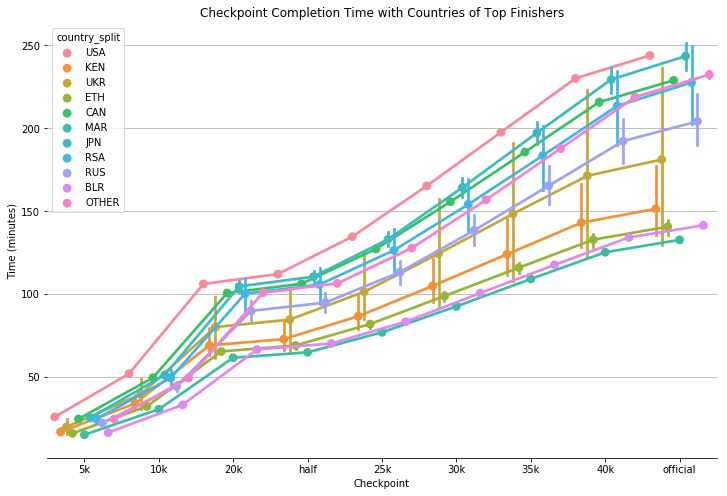

In [44]:
checkpoints = pd.melt(data,
                        value_vars=['5k', '10k', '20k', 'half', '25k', '30k', '35k', '40k', 'official'],
                        var_name='checkpoints',
                        value_name='time',
                        id_vars=['country_split'])

plt.figure(figsize=(12,8))
ax = sns.pointplot(data=checkpoints,
            x='checkpoints',
            y='time',
            hue='country_split',
            hue_order=['USA', 'KEN', 'UKR', 'ETH', 'CAN', 'MAR', 'JPN', 'RSA', 'RUS', 'BLR', 'OTHER'],
            ci=95,
            orient="v",
            dodge=0.8)

ax.grid(axis='y')
sns.despine(left=True)

plt.title('Checkpoint Completion Time with Countries of Top Finishers')
plt.ylabel('Time (minutes)')
plt.xlabel('Checkpoint')

plt.show()


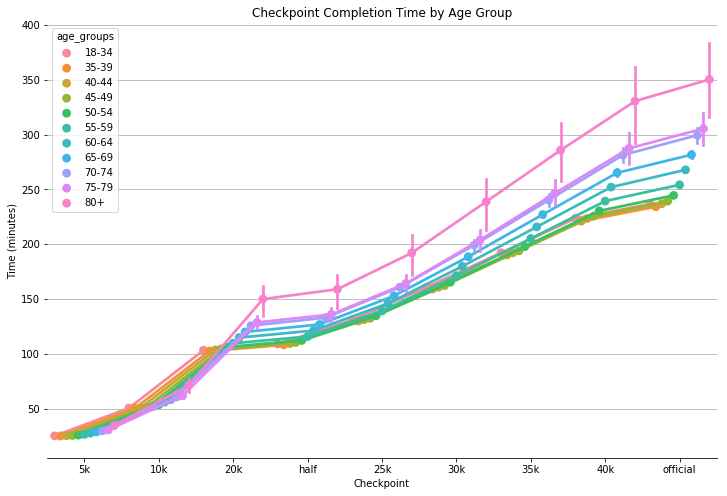

In [45]:
checkpoints = pd.melt(data,
                        value_vars=['5k', '10k', '20k', 'half', '25k', '30k', '35k', '40k', 'official'],
                        var_name='checkpoints',
                        value_name='time',
                        id_vars=['age_groups'])

plt.figure(figsize=(12,8))
ax = sns.pointplot(data=checkpoints,
            x='checkpoints',
            y='time',
            hue='age_groups',
            ci=95,
            orient="v",
            dodge=0.8)

ax.grid(axis='y')
sns.despine(left=True)

plt.title('Checkpoint Completion Time by Age Group')
plt.ylabel('Time (minutes)')
plt.xlabel('Checkpoint')

plt.show()


In [46]:
features = pd.DataFrame()

In [47]:
data.columns

Index(['10k', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', '35k', 'overall', 'pace', 'state', '30k', '5k', 'half',
       '20k', 'country', 'city', '40k', 'age_groups', 'wave', 'country_split'],
      dtype='object')

In [48]:
data.dtypes

10k               float64
division            int64
25k               float64
gender              int64
age                 int64
official          float64
bib               float64
genderdiv           int64
35k               float64
overall             int64
pace              float64
state              object
30k               float64
5k                float64
half              float64
20k               float64
country            object
city               object
40k               float64
age_groups       category
wave             category
country_split      object
dtype: object

In [49]:
# Load in the features we want, notably age, gender, the checkpoints, age group (dummies), country split (dummies),
# pace, and wave (dummies)

# Add checkpoint times.
for col in ['5k', '10k', '20k', 'half', '25k', '30k', '35k', '40k', 'official']:
    features[col] = data[col]

In [50]:

features['overall'] = data['overall']

features['division'] = data['division']

features['genderdiv'] = data['genderdiv']

In [51]:
# Add countries with top 10 finishers - as binary features
for country in ['USA', 'KEN', 'UKR', 'ETH', 'CAN', 'MAR', 'JPN', 'RSA', 'RUS', 'BLR', 'OTHER']:
    features[country] = np.where(data['country'] == country, 1, 0)

In [52]:
# Do the same with age groups

for group in data['age_groups']:
    features[group] = np.where(data['age_groups'] == group, 1,0)

In [53]:
# Add waves as binary columns.
for wave in data['wave'].unique():
    features[wave] = np.where(data['wave'] == wave, 1, 0)

# Clustering

We'll use K-Means clustering, as well as hierarchical, DBSCAN, and mean-shift. I won't use affinity because of the size of the dataframe

In [54]:
features.head()

,5k,10k,20k,half,25k,30k,35k,40k,official,overall,...,65-69,70-74,75-79,80+,Wheelchair,Elite,Wave1,Wave2,Wave3,Wave4
0,8.02,17.37,37.65,39.72,47.67,59.18,71.40,80.43,85.25,8,...,0,0,0,0,1,0,0,0,0,0
1,16.22,32.58,65.83,69.47,82.43,99.33,116.37,132.10,138.95,21,...,0,0,0,0,0,1,0,0,0,0
2,7.75,16.62,36.10,38.03,45.80,56.45,67.42,76.10,80.60,1,...,0,0,0,0,1,0,0,0,0,0
3,16.20,32.57,65.83,69.47,82.43,99.33,116.37,132.95,140.58,27,...,0,0,0,0,0,1,0,0,0,0
4,8.02,17.12,36.58,38.60,46.37,57.03,67.83,76.72,81.23,2,...,0,0,0,0,1,0,0,0,0,0


# PCA

In [55]:
from matplotlib.mlab import PCA as mlabPCA
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = features

# First center and scale the data
scaled_data = StandardScaler().fit_transform(X)
X_scaled = pd.DataFrame(scaled_data, columns=list(features))
X_scaled.head(2)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,5k,10k,20k,half,25k,30k,35k,40k,official,overall,...,65-69,70-74,75-79,80+,Wheelchair,Elite,Wave1,Wave2,Wave3,Wave4
0,-4.189011,-3.933261,-3.532013,-3.520651,-3.359660,-3.183865,-3.056622,-3.073577,-3.082125,-1.723549,...,-0.144352,-0.074568,-0.037313,-0.015901,24.415816,-0.054580,-0.568155,-0.573118,-0.580464,-0.580512
1,-2.243754,-2.187012,-2.061201,-2.055593,-2.000331,-1.963104,-1.953740,-1.998785,-2.025922,-1.722134,...,-0.144352,-0.074568,-0.037313,-0.015901,-0.040957,18.321595,-0.568155,-0.573118,-0.580464,-0.580512


In [58]:
# Utilizing Two Components
# Perform PCA for graphing purposes

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_1 = [x[0] for x in X_pca]
pca_2 = [x[1] for x in X_pca]

X_pca

array([[-10.91782571,   2.05339384],
       [ -7.70604434,  -0.81126173],
       [-11.23979213,   0.94984455],
       ...,
       [  3.31329784,  -2.47452454],
       [  4.6433127 ,  -2.05112523],
       [  0.5085067 ,  -0.14863388]])

In [60]:
# K Means

from sklearn.cluster import KMeans

y_pred = KMeans(n_clusters=10).fit_predict(X_pca)


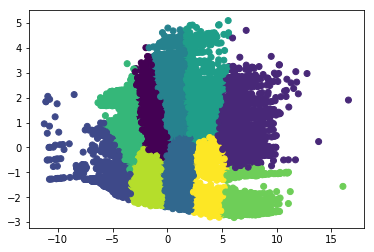

In [62]:
#Plot the solution
plt.scatter(X_pca[:,0],X_pca[:, 1], c=y_pred)
plt.show()

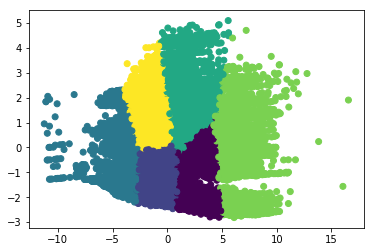

In [64]:
# Try 6 clusters: each wave, wheelchairs, and elite?

# K Means

from sklearn.cluster import KMeans

y_pred = KMeans(n_clusters=6).fit_predict(X_pca)

#Plot the solution
plt.scatter(X_pca[:,0],X_pca[:, 1], c=y_pred)
plt.show()

In [65]:
# Mean Shift

from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_pca, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_pca)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 3


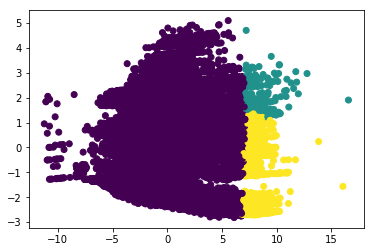

In [67]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.show()

In [68]:
# Heirarchical 

from sklearn.cluster import AgglomerativeClustering

In [75]:
heir = AgglomerativeClustering(n_clusters=6, 
                        affinity='euclidean', 
                        memory=None, 
                        connectivity=None, 
                        compute_full_tree='auto', 
                        linkage='ward', 
                        pooling_func='deprecated')

heir.fit(X_pca)

y_pred = heir.fit_predict(X_pca)

In [76]:
y_pred

array([2, 2, 2, ..., 3, 1, 3])

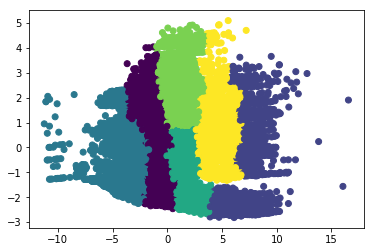

In [77]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

These clusters look the same as the K Means clusters with 6. Let's look at 4 and 10

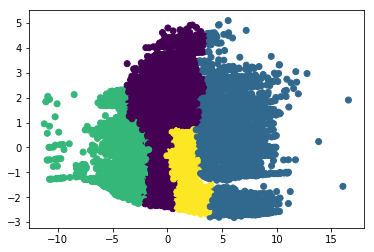

In [78]:
heir = AgglomerativeClustering(n_clusters=4, 
                        affinity='euclidean', 
                        memory=None, 
                        connectivity=None, 
                        compute_full_tree='auto', 
                        linkage='ward', 
                        pooling_func='deprecated')

heir.fit(X_pca)

y_pred = heir.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

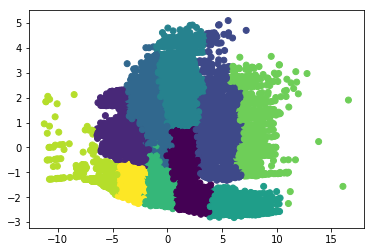

In [79]:
heir = AgglomerativeClustering(n_clusters=10, 
                        affinity='euclidean', 
                        memory=None, 
                        connectivity=None, 
                        compute_full_tree='auto', 
                        linkage='ward', 
                        pooling_func='deprecated')

heir.fit(X_pca)

y_pred = heir.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()